In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df['age'][df['age'] == 0].count()

0

In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['bmi'][df['bmi'] == 0].count()

0

In [13]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [14]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
df['charges'][df['charges'] == 0].count()

0

In [17]:
gender = pd.get_dummies(df['sex'], prefix=['gender'], drop_first=True)

In [18]:
gender

,['gender']_male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [19]:
smoker = pd.get_dummies(df['smoker'], prefix='smoker', drop_first=True)

In [20]:
smoker

,smoker_yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [21]:
region = pd.get_dummies(df.region, prefix='region', drop_first=False)

In [22]:
region

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [26]:
df = df[['age', 'bmi', 'children', 'charges']]

In [27]:
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [29]:
df = pd.concat((df, gender), axis=1)

In [30]:
df.head()

,age,bmi,children,charges,['gender']_male
0,19,27.900,0,16884.92400,0
1,18,33.770,1,1725.55230,1
2,28,33.000,3,4449.46200,1
3,33,22.705,0,21984.47061,1
4,32,28.880,0,3866.85520,1


In [31]:
df = pd.concat((df, region), axis=1)

In [32]:
df.head()

,age,bmi,children,charges,['gender']_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [34]:
df = pd.concat((df, smoker), axis=1)

In [35]:
df.head()

,age,bmi,children,charges,['gender']_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,0


In [36]:
df.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
['gender']_male       uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
smoker_yes            uint8
dtype: object

In [37]:
df.describe()

,age,bmi,children,charges,['gender']_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.242334,0.242334,0.272251,0.243082,0.204936
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.428655,0.428655,0.445285,0.429104,0.403806
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

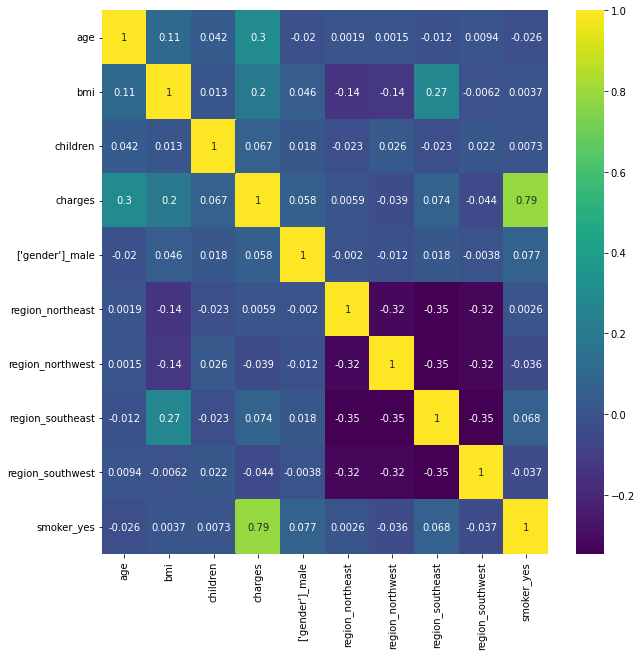

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='viridis', cbar=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

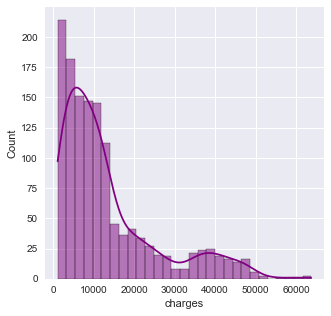

In [39]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x = df.charges, color='purple', kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

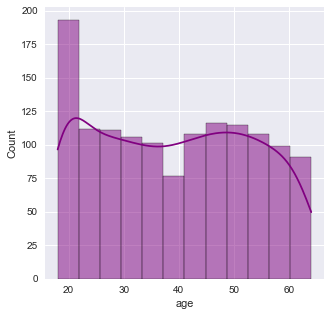

In [40]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x = df.age, color='purple', kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

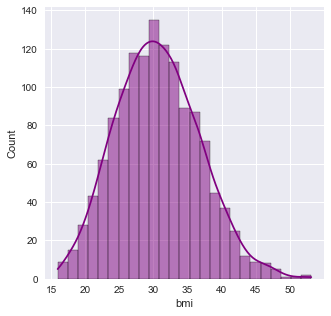

In [41]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x = df.bmi, color='purple', kde=True)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
X = df.drop('charges', axis=1)
y = df['charges']

In [46]:
X.head()

,age,bmi,children,['gender']_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,0,0,0,0,1,1
1,18,33.770,1,1,0,0,1,0,0
2,28,33.000,3,1,0,0,1,0,0
3,33,22.705,0,1,0,1,0,0,0
4,32,28.880,0,1,0,1,0,0,0


In [47]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [48]:
sc = StandardScaler()

In [49]:
x_scale = sc.fit_transform(X)
x_scale

array([[-1.44041773, -0.45315959, -0.90923416, ..., -0.61163774,
         1.76460935,  1.96966039],
       [-1.51164747,  0.50942165, -0.07944162, ...,  1.63495472,
        -0.56669767, -0.50770174],
       [-0.79935006,  0.3831546 ,  1.58014347, ...,  1.63495472,
        -0.56669767, -0.50770174],
       ...,
       [-1.51164747,  1.01448983, -0.90923416, ...,  1.63495472,
        -0.56669767, -0.50770174],
       [-1.29795825, -0.79752426, -0.90923416, ..., -0.61163774,
         1.76460935, -0.50770174],
       [ 1.55123139, -0.26129928, -0.90923416, ..., -0.61163774,
        -0.56669767,  1.96966039]])

In [60]:
x_scale[:]

array([[-1.44041773, -0.45315959, -0.90923416, ..., -0.61163774,
         1.76460935,  1.96966039],
       [-1.51164747,  0.50942165, -0.07944162, ...,  1.63495472,
        -0.56669767, -0.50770174],
       [-0.79935006,  0.3831546 ,  1.58014347, ...,  1.63495472,
        -0.56669767, -0.50770174],
       ...,
       [-1.51164747,  1.01448983, -0.90923416, ...,  1.63495472,
        -0.56669767, -0.50770174],
       [-1.29795825, -0.79752426, -0.90923416, ..., -0.61163774,
         1.76460935, -0.50770174],
       [ 1.55123139, -0.26129928, -0.90923416, ..., -0.61163774,
        -0.56669767,  1.96966039]])

<AxesSubplot:ylabel='Count'>

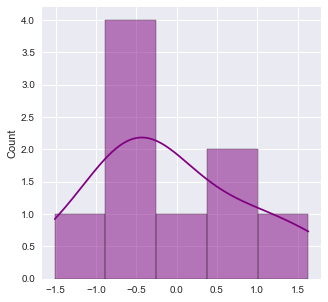

In [54]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x = x_scale[1], color='purple', kde=True)

In [61]:
sns.pairplot(x_scale)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25, random_state=322)

In [63]:
liner_model = LinearRegression()

In [64]:
liner_model.fit(x_train,y_train)

LinearRegression()

In [65]:
liner_model.score(x_test, y_test)

0.7042091744356883

In [66]:
liner_model.score(x_train,y_train)

0.7633991799372944

In [68]:
prediction = liner_model.predict(x_test)

C:\Users\PC\.conda\envs\insurenceenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

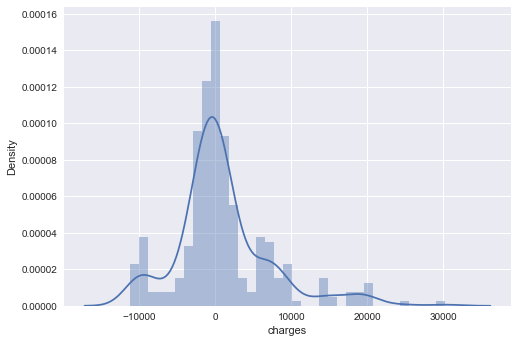

In [69]:
sns.distplot(y_test-prediction)

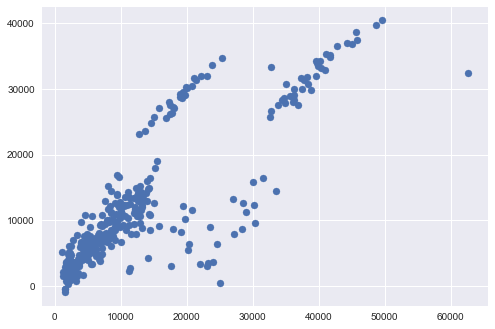

In [70]:
plt.scatter(y_test, prediction)

In [71]:
from sklearn import metrics

In [72]:
"MAE: {}".format(metrics.mean_absolute_error(y_test, prediction))

'MAE: 4126.231221868515'

In [73]:
"MAE: {}".format(metrics.mean_squared_error(y_test, prediction))

'MAE: 40535007.172574766'

In [74]:
"MAE: {}".format(np.sqrt(metrics.mean_squared_error(y_test, prediction)))

'MAE: 6366.710859821951'

In [75]:
import pickle

In [76]:
file = open('liner_model.pkl', 'wb')
pickle.dump(liner_model, file)